Etapas encontradas no CSV:
['antes' 'depois indices' 'depois indices e otimizacao' 'depois_s_seqscan'
 'depois_c_seqscan']

--- Top 5 Melhorias (Speedup) ---
Q20: 125.4x mais rápido (99.2% de melhoria)
Q15: 4.5x mais rápido (77.6% de melhoria)
Q06: 3.6x mais rápido (72.4% de melhoria)
Q03: 3.3x mais rápido (69.3% de melhoria)
Q04: 3.0x mais rápido (66.8% de melhoria)



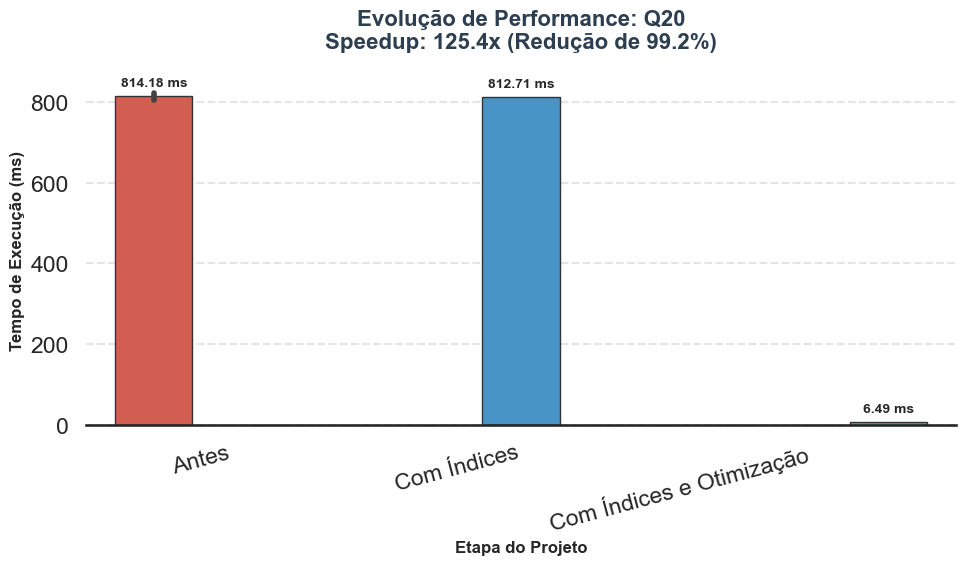

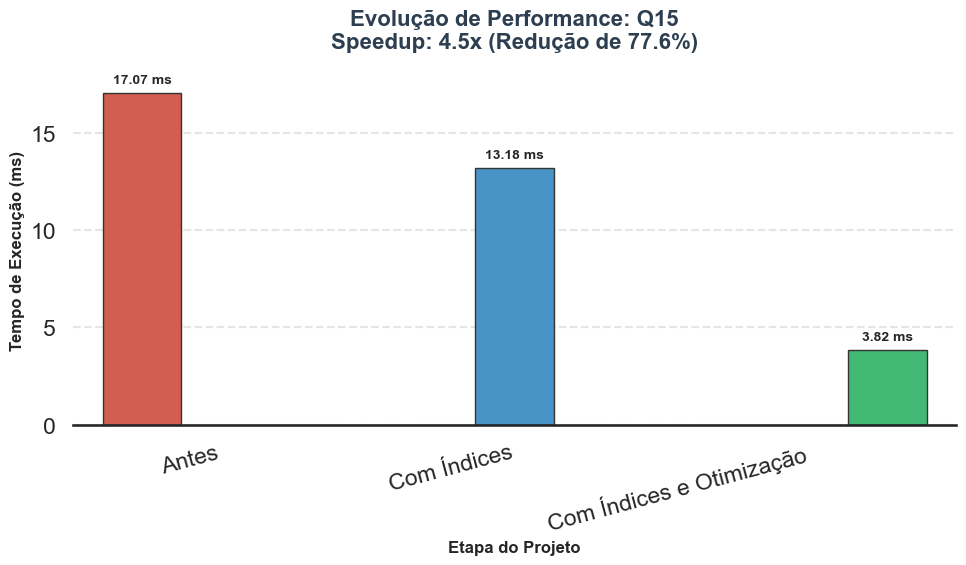

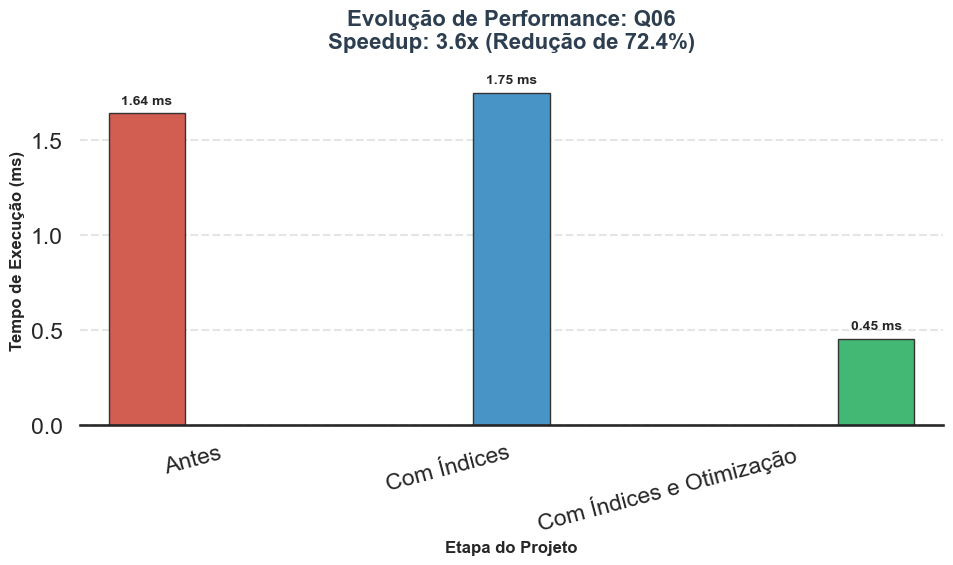

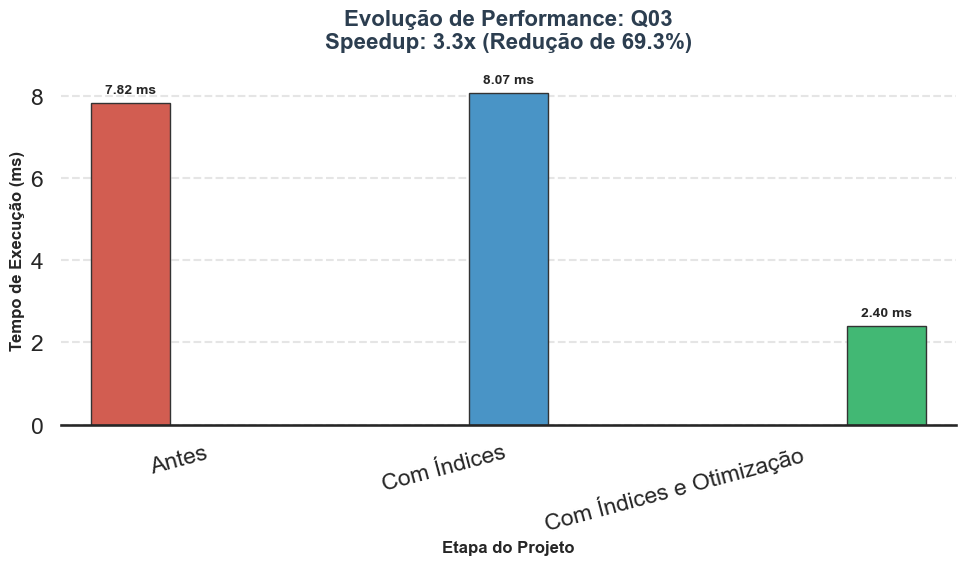

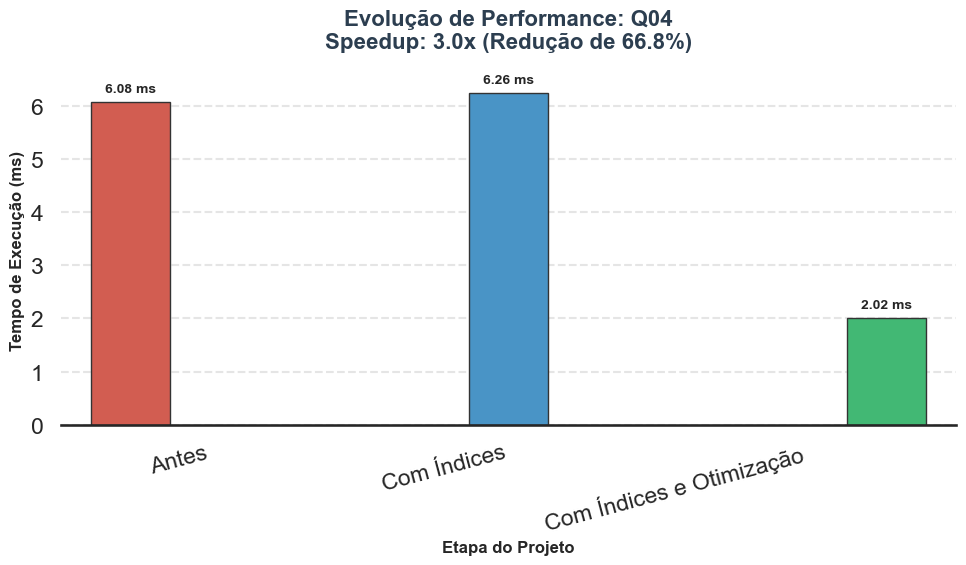


Todos os gráficos foram gerados!


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- Configuração de Estilo Profissional ---
sns.set_theme(style="white", context="talk") 

# 1. Carregar os dados
file_path = 'bd054 benchmarking - Benchmark_results.csv'

if not os.path.exists(file_path):
    print(f"Erro: O ficheiro '{file_path}' não foi encontrado.")
else:
    df = pd.read_csv(file_path)

    # 2. Preparar os dados
    df['total_time'] = pd.to_numeric(df['total_time'], errors='coerce')
    
    # Remover linhas com valores NULL/NaN
    df = df.dropna(subset=['total_time'])

    # Verificar quais etapas existem no CSV
    print("Etapas encontradas no CSV:")
    print(df['etapa'].unique())
    print()

    # Definir Ordem e CORES SEMÂNTICAS
    ordem_etapas = ['antes', 'depois indices', 'depois indices e otimizacao']
    
    # Labels para os gráficos
    labels_etapas = {
        'antes': 'Antes',
        'depois indices': 'Com Índices',
        'depois indices e otimizacao': 'Com Índices e Otimização'
    }
    
    cores_personalizadas = {
        'antes': '#e74c3c',                          # Vermelho
        'depois indices': '#3498db',                 # Azul
        'depois indices e otimizacao': '#2ecc71'     # Verde
    }

    # Filtrar apenas as etapas que existem
    etapas_existentes = [e for e in ordem_etapas if e in df['etapa'].unique()]
    df = df[df['etapa'].isin(etapas_existentes)].copy()
    df['etapa'] = pd.Categorical(df['etapa'], categories=etapas_existentes, ordered=True)

    # 3. Calcular Melhorias e Speedup
    # Agrupar por query_name e etapa (média se houver múltiplas execuções)
    pivot_df = df.pivot_table(index='query_name', columns='etapa', values='total_time', aggfunc='mean')
    
    # Usar a última etapa como referência final
    col_final = etapas_existentes[-1]
    col_inicial = 'antes'
    
    # Calcular Speedup e % de Melhoria
    pivot_df['speedup'] = pivot_df[col_inicial] / pivot_df[col_final]
    pivot_df['melhoria_pct'] = (pivot_df[col_inicial] - pivot_df[col_final]) / pivot_df[col_inicial] * 100
    
    # Remover queries sem dados completos
    pivot_df = pivot_df.dropna(subset=['speedup', 'melhoria_pct'])

    # Selecionar Top 5
    top_n = 5
    top_queries = pivot_df.nlargest(top_n, 'melhoria_pct').index.tolist()

    print(f"--- Top {top_n} Melhorias (Speedup) ---")
    for q in top_queries:
        print(f"{q}: {pivot_df.loc[q, 'speedup']:.1f}x mais rápido ({pivot_df.loc[q, 'melhoria_pct']:.1f}% de melhoria)")
    print()

    df_final = df[df['query_name'].isin(top_queries)]

    # 4. Gerar Gráficos Individuais
    for query in top_queries:
        df_query = df_final[df_final['query_name'] == query]
        
        # Criar uma cópia com labels mais legíveis
        df_query_plot = df_query.copy()
        df_query_plot['etapa_label'] = df_query_plot['etapa'].map(labels_etapas)
        
        # Criar figura
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Gráfico de Barras
        chart = sns.barplot(
            data=df_query_plot,
            x='etapa_label',
            y='total_time',
            hue='etapa',
            palette=cores_personalizadas,
            ax=ax,
            edgecolor=".2",
            linewidth=1,
            order=[labels_etapas[e] for e in etapas_existentes if e in df_query['etapa'].values]
        )
        
        # Títulos e Informações de Impacto
        speedup_val = pivot_df.loc[query, 'speedup']
        melhoria_val = pivot_df.loc[query, 'melhoria_pct']
        
        ax.set_title(
            f'Evolução de Performance: {query}\n'
            f'Speedup: {speedup_val:.1f}x (Redução de {melhoria_val:.1f}%)', 
            fontsize=16, 
            fontweight='bold',
            pad=20,
            color='#2c3e50'
        )
        
        ax.set_ylabel('Tempo de Execução (ms)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Etapa do Projeto', fontsize=12, fontweight='bold')
        
        # Valores nas barras
        for container in chart.containers:
            chart.bar_label(container, fmt='%.2f ms', padding=5, fontsize=10, fontweight='bold')

        # Ajustes de Layout
        ax.yaxis.grid(True, linestyle='--', alpha=0.5)
        ax.xaxis.grid(False)
        sns.despine(left=True)
        
        # Remover legenda automática
        if ax.get_legend():
            ax.get_legend().remove()

        plt.xticks(rotation=15, ha='right')
        plt.tight_layout()
        plt.show()

print("\nTodos os gráficos foram gerados!")


In [ ]:
# --- GUARDAR GRÁFICOS COMO IMAGENS ---
# Execute esta célula quando quiser guardar os gráficos em ficheiros PNG

for query in top_queries:
    df_query = df_final[df_final['query_name'] == query]
    
    # Criar uma cópia com labels mais legíveis
    df_query_plot = df_query.copy()
    df_query_plot['etapa_label'] = df_query_plot['etapa'].map(labels_etapas)
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Gráfico de Barras
    chart = sns.barplot(
        data=df_query_plot,
        x='etapa_label',
        y='total_time',
        hue='etapa',
        palette=cores_personalizadas,
        ax=ax,
        edgecolor=".2",
        linewidth=1,
        order=[labels_etapas[e] for e in etapas_existentes if e in df_query['etapa'].values]
    )
    
    # Títulos e Informações
    speedup_val = pivot_df.loc[query, 'speedup']
    melhoria_val = pivot_df.loc[query, 'melhoria_pct']
    
    ax.set_title(
        f'Evolução de Performance: {query}\n'
        f'Speedup: {speedup_val:.1f}x (Redução de {melhoria_val:.1f}%)', 
        fontsize=16, 
        fontweight='bold',
        pad=20,
        color='#2c3e50'
    )
    
    ax.set_ylabel('Tempo de Execução (ms)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Etapa do Projeto', fontsize=12, fontweight='bold')
    
    # Valores nas barras
    for container in chart.containers:
        chart.bar_label(container, fmt='%.2f ms', padding=5, fontsize=10, fontweight='bold')

    # Ajustes de Layout
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(False)
    sns.despine(left=True)
    
    # Remover legenda
    if ax.get_legend():
        ax.get_legend().remove()

    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    
    # Guardar
    filename = f'grafico_performance_{query}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    print(f"Gráfico guardado: {filename}")

print("\nTodos os gráficos foram guardados com sucesso!")
